<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

First we compute the loglikelihood

$ lnL(\lambda) = \sum_i^n ln(\lambda^x) + ln(e^{-\lambda}) - ln(x!) = \sum_i^n xln(\lambda) -\lambda -ln(x) $

then we compute maximum likelihood estimator $MLE$ by 1st derivation

$MLE = \frac{d}{d\lambda}lnL(\lambda) = \sum_i^n xln(\lambda) -\lambda -ln(x) \frac{d}{d\lambda} = \sum_i^n \frac{x}{\lambda} - 1 - 0 = \sum_i^n \frac{x}{\lambda} - 1$

then we set to 0 and solve for $\lambda$

$ \sum_i^n (\frac{x}{\lambda}-1) = 0 $

$ \sum_i^n\frac{x}{\lambda} - \sum_i^n(1) = 0$

$ \sum_i^n\frac{x}{\lambda} = n $

$ \sum_i^n{x} = n\lambda $

$ \frac{1}{n}\sum_i^n{x} = \lambda $

In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [5]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


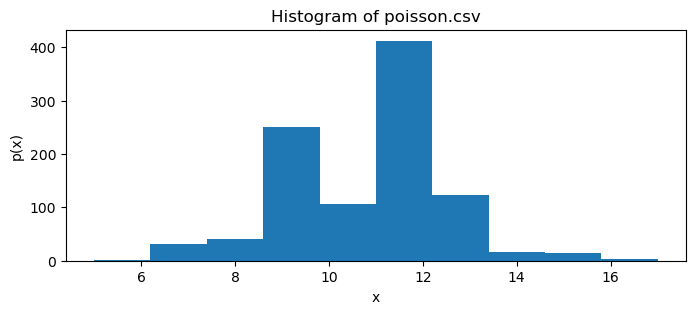

In [6]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [7]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [8]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [11]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ########## YOUR SOLUTION HERE ##########   
    return 1/X.size * np.sum(X)

In [12]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [21]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    ########## YOUR SOLUTION HERE ##########
    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    lam_max = lam_set[np.argmax(loglikelih)]
    
    return loglikelih, ln_min, ln_max, lam_max

In [22]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

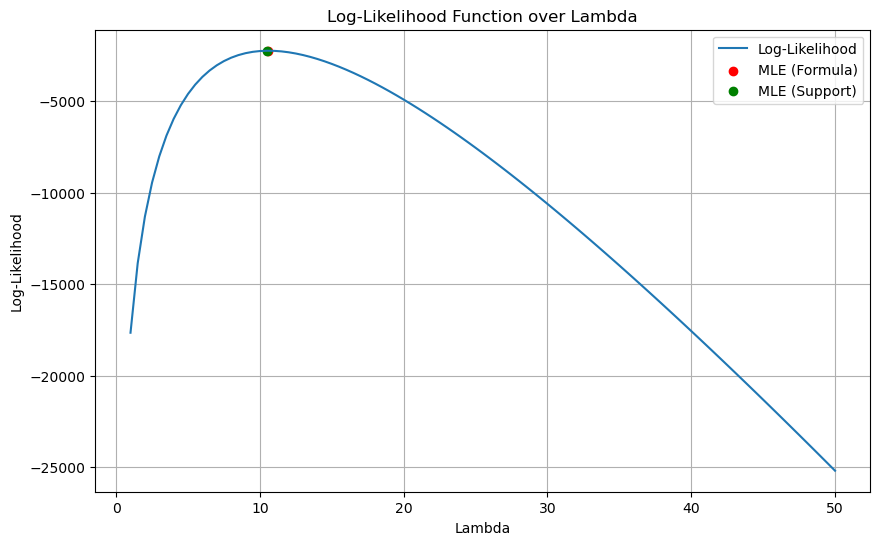

In [29]:
########## YOUR SOLUTION HERE ##########

# Compute MLE using both methods
lam_max_formula = estimator_formula(X)
log_likelihoods, ln_min, ln_max, lam_max_support = estimator_support(X, lam_set)

# Plotting
plt.figure(figsize=(10, 6))

# Plot log-likelihood function
plt.plot(lam_set, [loglikelihood(X, lam) for lam in lam_set], label='Log-Likelihood')

# Mark the maxima according to estimator_formula and estimator_support
plt.scatter(lam_max_formula, loglikelihood(X, lam_max_formula), color='red', label='MLE (Formula)')
plt.scatter(lam_max_support, loglikelihood(X, lam_max_support), color='green', label='MLE (Support)')

# Set labels and title
plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Function over Lambda')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########